<a href="https://colab.research.google.com/github/Saul-Ochoa/Python-MachineLearning/blob/main/Machine%20learning%20projects/Future_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Future Prediction**

A company's HR department wants to predict whether some customers would leave the company in next 2 years. Your job is to build a predictive model that predicts the prospects of future and present employee.


In [2]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 3.5 MB/s eta 0:00:00


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url='https://raw.githubusercontent.com/Saul-Ochoa/Python-MachineLearning/main/Machine%20learning%20projects/Data/Employee.csv'

In [5]:
df=pd.read_csv(url,sep=',')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [6]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [8]:
df.shape

(4653, 9)

In [9]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

## Data Preprocessing

In [10]:
df.select_dtypes(include='object').nunique()

Education      3
City           3
Gender         2
EverBenched    2
dtype: int64

In [11]:
df.select_dtypes(include='number').nunique()

JoiningYear                   7
PaymentTier                   3
Age                          20
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

In [12]:
#target
df['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

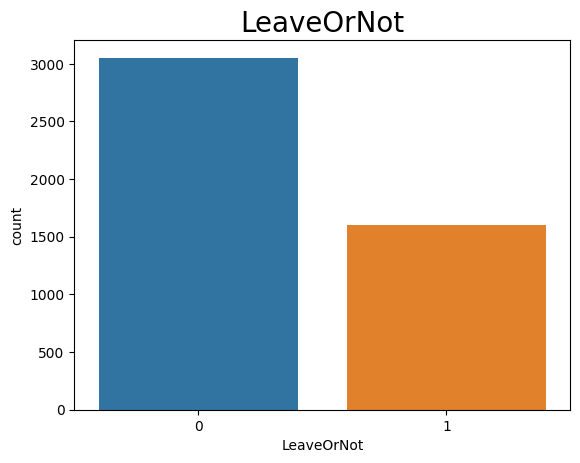

In [13]:
sns.countplot(data=df,x='LeaveOrNot')
plt.title('LeaveOrNot',fontsize=20)
plt.show()

In [14]:
df['LeaveOrNot']=df['LeaveOrNot'].astype(str)
df['LeaveOrNot']=df['LeaveOrNot'].map({'1':'yes','0':'no'})

In [15]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,no
1,Bachelors,2013,Pune,1,28,Female,No,3,yes
2,Bachelors,2014,New Delhi,3,38,Female,No,2,no
3,Masters,2016,Bangalore,3,27,Male,No,5,yes
4,Masters,2017,Pune,3,24,Male,Yes,2,yes


In [16]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                   object
dtype: object

## Exploratory Data Analysis

In [17]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [18]:
df.select_dtypes(include='object').nunique()

Education      3
City           3
Gender         2
EverBenched    2
LeaveOrNot     2
dtype: int64

In [19]:
df['PaymentTier'].value_counts()

3    3492
2     918
1     243
Name: PaymentTier, dtype: int64

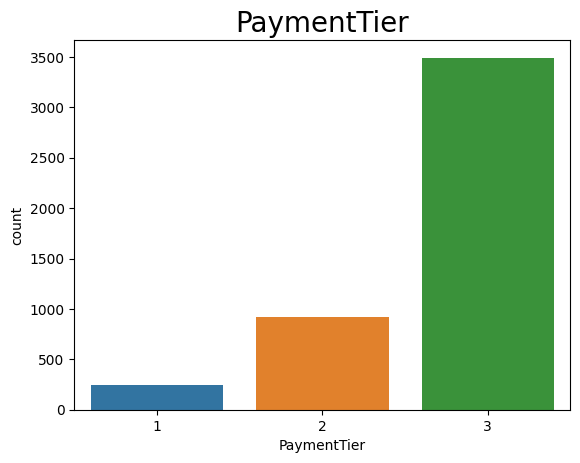

In [20]:
sns.countplot(data=df,x='PaymentTier')
plt.title('PaymentTier',fontsize=20)
plt.show()

**Variables Categoricas**

In [21]:
cat_vats=['Education', 'City','Gender','EverBenched','PaymentTier']

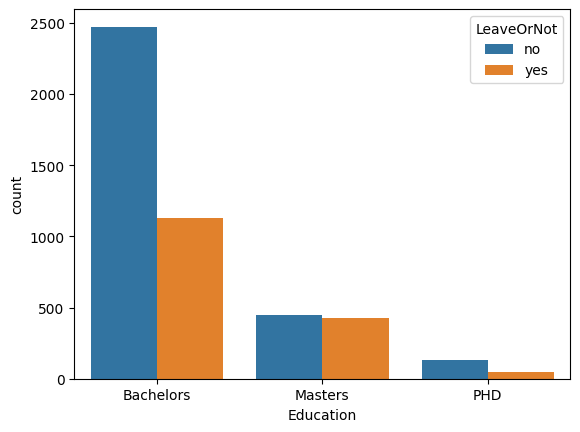

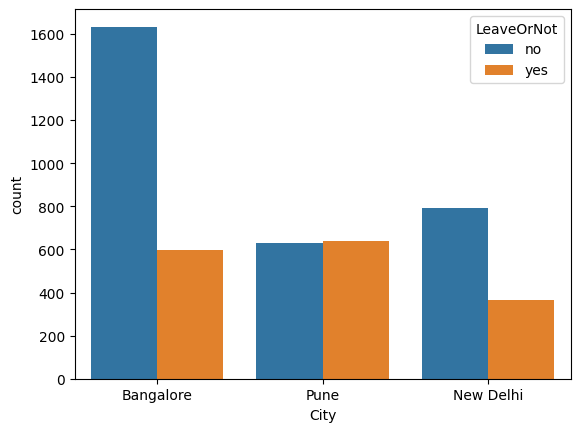

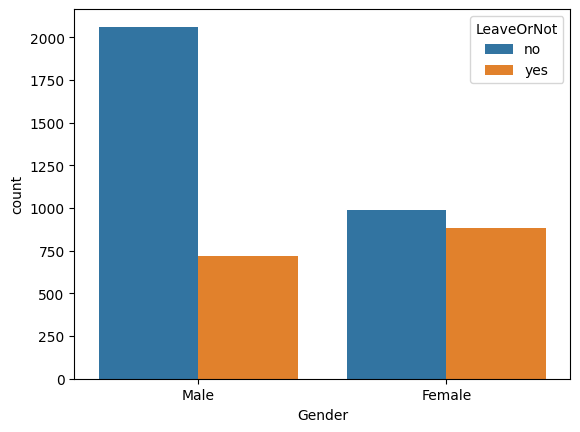

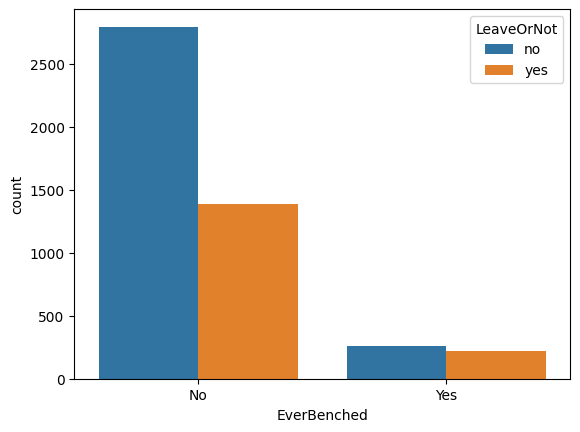

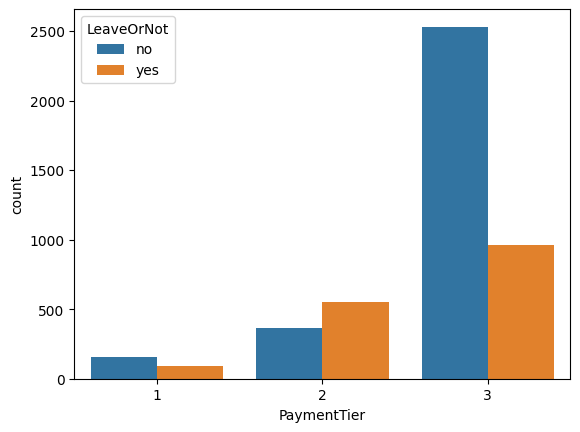

In [22]:
for i in cat_vats:
  sns.countplot(data=df,x=i,hue='LeaveOrNot')
  plt.show()

**Variables Numericas**

In [23]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                   object
dtype: object

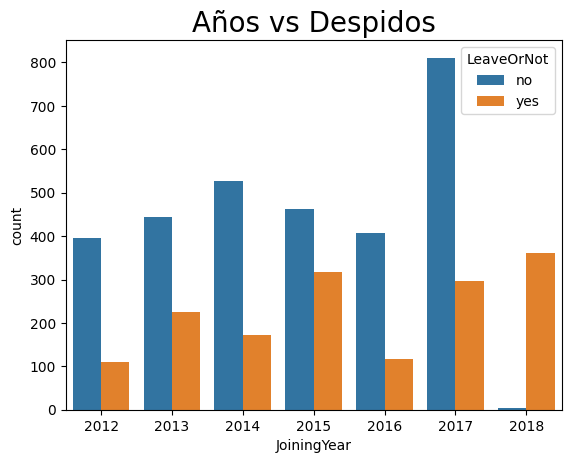

In [24]:
sns.countplot(data=df,x='JoiningYear',hue='LeaveOrNot')
plt.title('Años vs Despidos',fontsize=20)
plt.show()

In [25]:
cat_vats=['Education', 'City','Gender','EverBenched','PaymentTier']

In [26]:
num_vats=['JoiningYear','Age','ExperienceInCurrentDomain']

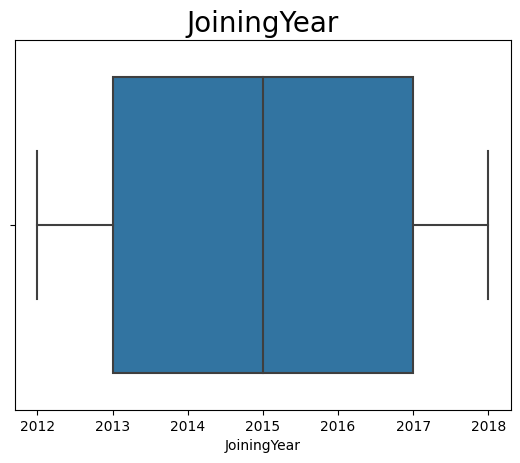

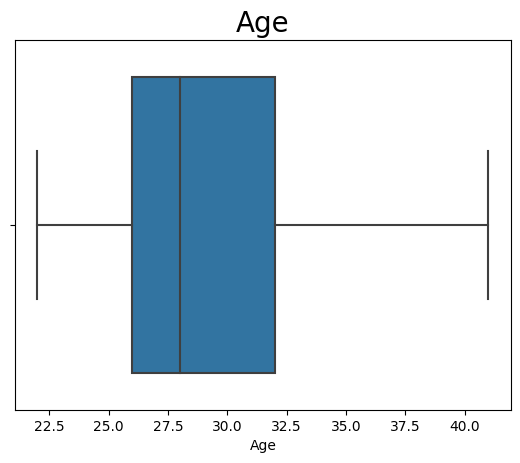

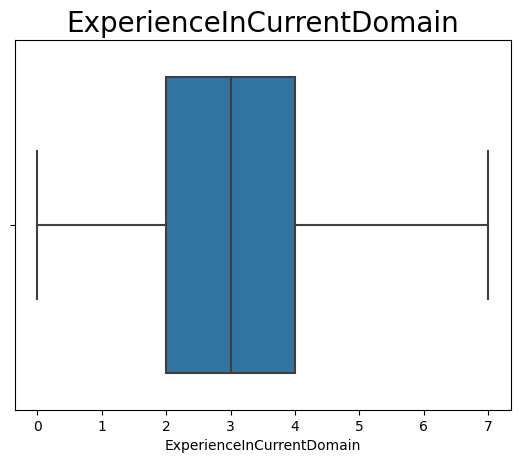

In [27]:
for i in num_vats:
  sns.boxplot(data=df,x=i)
  plt.title(i,fontsize=20)
  plt.show()

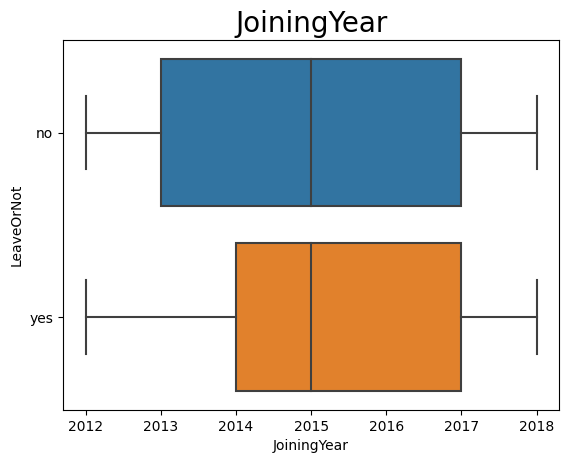

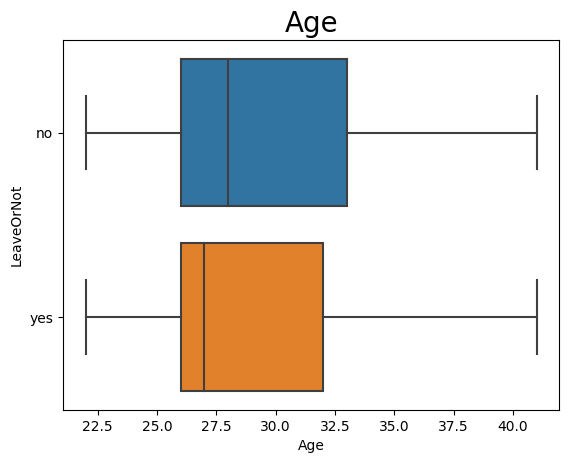

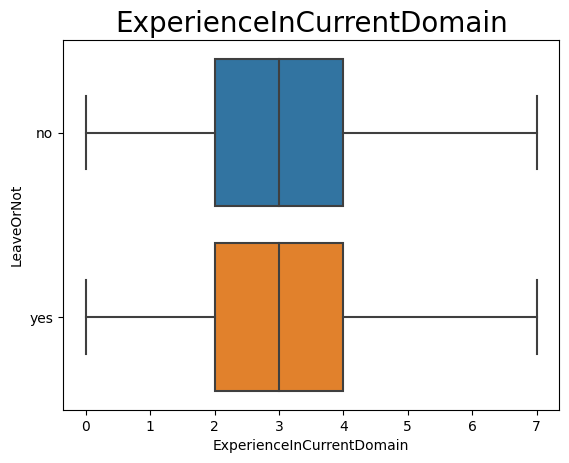

In [28]:
for i in num_vats:
  sns.boxplot(data=df,x=i,y='LeaveOrNot')
  plt.title(i,fontsize=20)
  plt.show()

## **Missing Values**

In [29]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

## **Label Encoding**

In [30]:
for col in df.select_dtypes(include=['object']).columns:
  print(f"{col}: {df[col].unique()}")

Education: ['Bachelors' 'Masters' 'PHD']
City: ['Bangalore' 'Pune' 'New Delhi']
Gender: ['Male' 'Female']
EverBenched: ['No' 'Yes']
LeaveOrNot: ['no' 'yes']


In [31]:
from sklearn import preprocessing
for col in df.select_dtypes(include=['object']).columns:
  label_encoder=preprocessing.LabelEncoder()
  label_encoder.fit(df[col].unique())
  df[col]=label_encoder.transform(df[col])
  print(f"{col} : {df[col].unique()}")

Education : [0 1 2]
City : [0 2 1]
Gender : [1 0]
EverBenched : [0 1]
LeaveOrNot : [0 1]


In [32]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


**No hay oulier se puede evidenciar en el boxplot de la data prepocesing**

In [33]:
df.corr()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
Education,1.000000,0.142670,0.149903,-0.140741,-0.010611,-0.010889,-0.052249,-0.004463,0.080497
JoiningYear,0.142670,1.000000,0.051441,-0.096078,0.013165,-0.012213,0.049353,-0.036525,0.181705
City,0.149903,0.051441,1.000000,-0.295884,-0.030706,-0.168546,-0.007046,-0.009925,0.201058
PaymentTier,-0.140741,-0.096078,-0.295884,1.000000,0.007631,0.235119,0.019207,0.018314,-0.197638
Age,-0.010611,0.013165,-0.030706,0.007631,1.000000,-0.003866,-0.016135,-0.134643,-0.051126
Gender,-0.010889,-0.012213,-0.168546,0.235119,-0.003866,1.000000,0.019653,0.008745,-0.220701
EverBenched,-0.052249,0.049353,-0.007046,0.019207,-0.016135,0.019653,1.000000,0.001408,0.078438
ExperienceInCurrentDomain,-0.004463,-0.036525,-0.009925,0.018314,-0.134643,0.008745,0.001408,1.000000,-0.030504
LeaveOrNot,0.080497,0.181705,0.201058,-0.197638,-0.051126,-0.220701,0.078438,-0.030504,1.000000


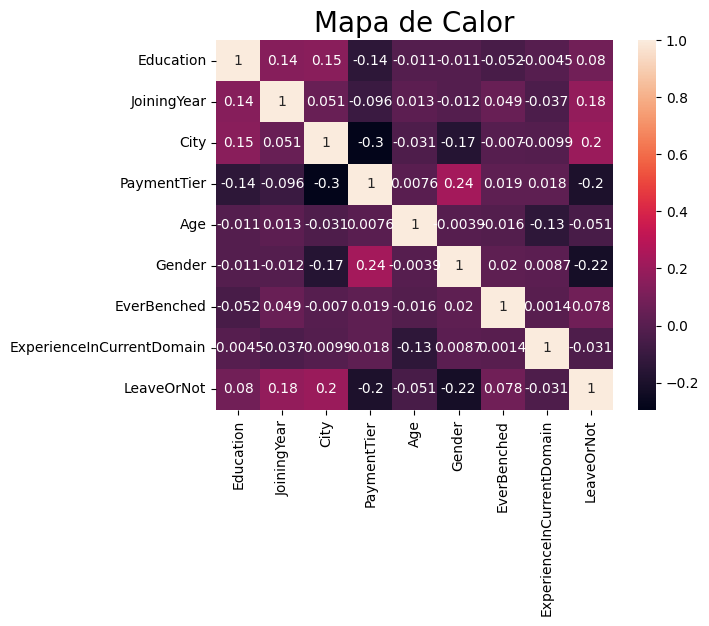

In [34]:
sns.heatmap(data=df.corr(),fmt='.2g', annot=True)
plt.title('Mapa de Calor',fontsize=20)
plt.show()

## Modelos de Prediccion

https://www.kaggle.com/code/gaganmaahi224/11classification-algos-eda-queries-visualization#Feature-Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [36]:
scaler = StandardScaler()
scaler.fit(df.drop('LeaveOrNot',axis = 1))

StandardScaler()

In [37]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [38]:
scaled_features = scaler.transform(df.drop('LeaveOrNot',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = ['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain'])
df_feat.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,-0.507731,1.039638,-0.942740,0.537503,0.954645,0.821551,-0.338365,-1.864901
1,-0.507731,-1.107233,1.432872,-3.025177,-0.288732,-1.217210,-0.338365,0.060554
2,-0.507731,-0.570515,0.245066,0.537503,1.783563,-1.217210,-0.338365,-0.581264
3,1.411418,0.502921,-0.942740,0.537503,-0.495961,0.821551,-0.338365,1.344191
4,1.411418,1.039638,1.432872,0.537503,-1.117650,0.821551,2.955387,-0.581264


In [39]:
X=df_feat
y=df['LeaveOrNot']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)

### **KNeighborsClassifier**

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
model=KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7,10],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Utilizar el mejor modelo para hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)


In [41]:
best_params

{'algorithm': 'brute',
 'metric': 'manhattan',
 'n_neighbors': 7,
 'weights': 'uniform'}

In [42]:
best_model

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=7)

In [43]:
knee = KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=7,weights='uniform')
knee.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=7)

In [44]:
y_pred = knee.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 83.08 %


In [45]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8307560137457045
Precision Score :  0.8307560137457045
Recall Score :  0.8307560137457045
Jaccard Score :  0.7105069801616458
Log Loss :  6.100171578742336


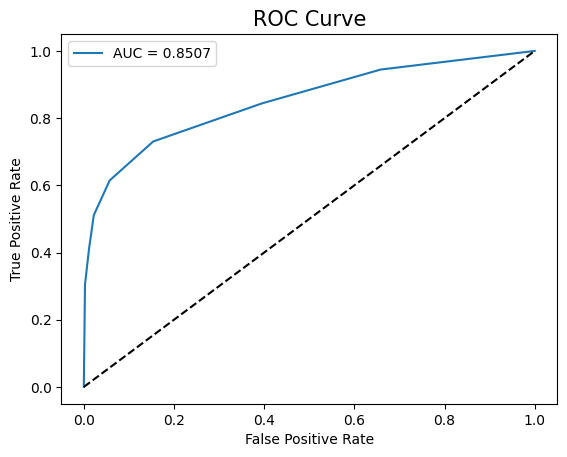

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = knee.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

### **Randomforest Classifier**

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model=RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42,100],
    'criterion':['gini','entropy', 'log_loss']
}
# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Utilizar el mejor modelo para hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

In [48]:
best_model

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='log2', random_state=42)

In [49]:
rfc=RandomForestClassifier(class_weight='balanced', criterion='entropy',max_depth=10, max_features='log2', random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='log2', random_state=42)

In [50]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 87.03 %


In [51]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8702749140893471
Precision Score :  0.8702749140893471
Recall Score :  0.8702749140893471
Jaccard Score :  0.7703422053231939
Log Loss :  4.675766032437019


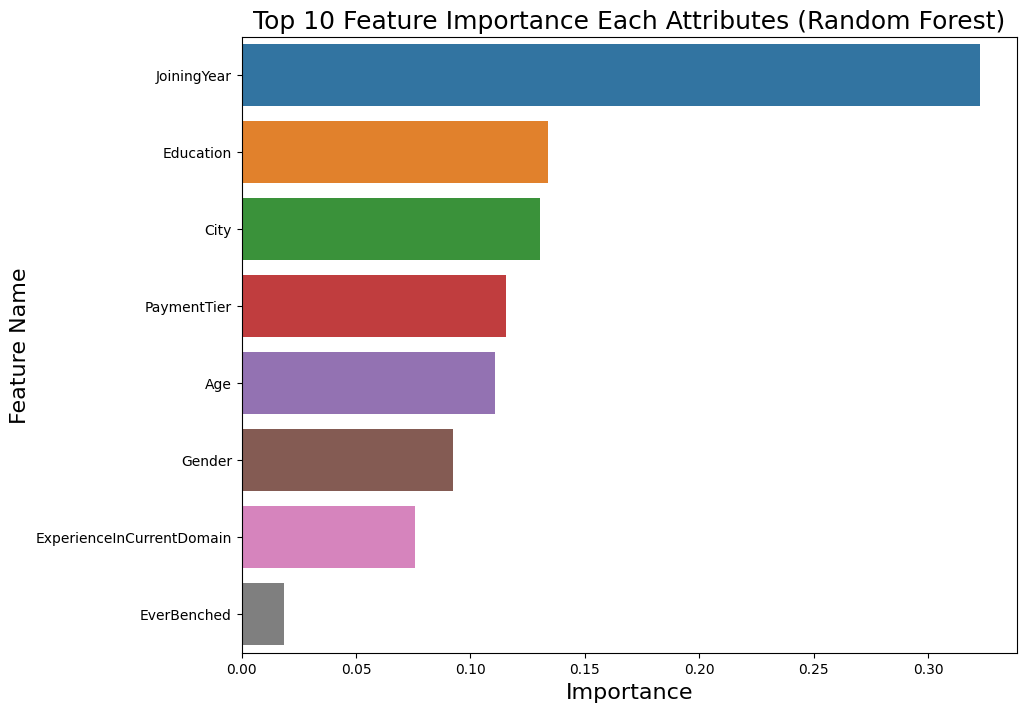

In [52]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

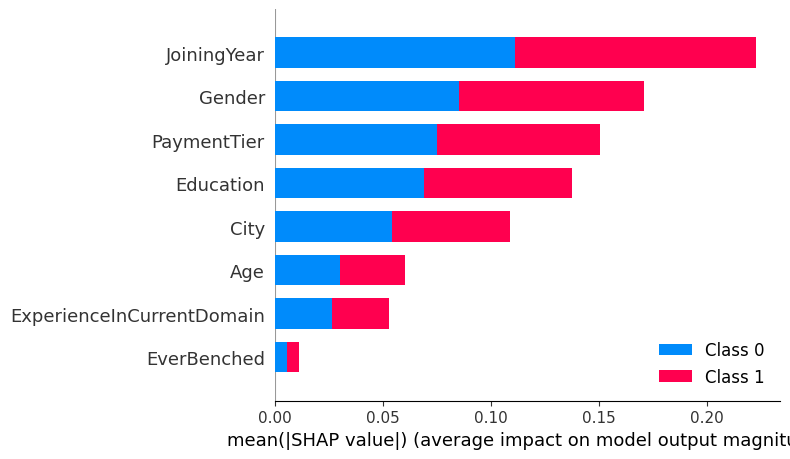

In [53]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


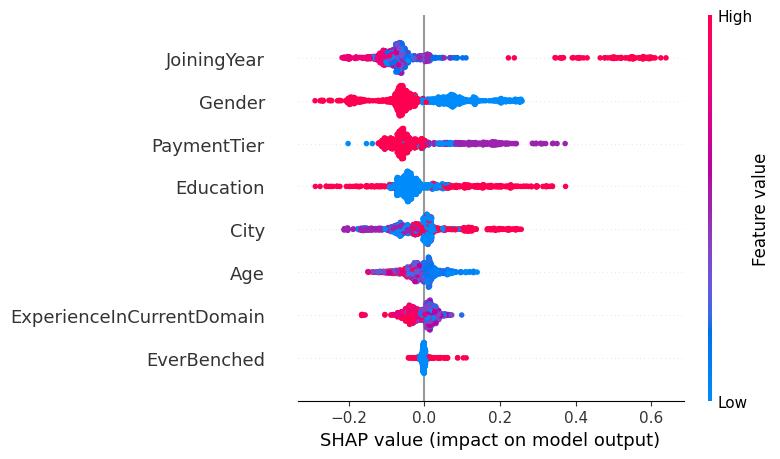

In [54]:
# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


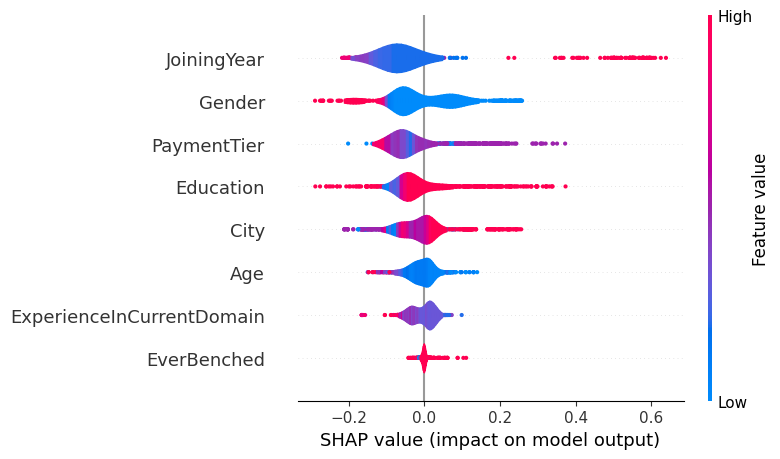

In [55]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns, plot_type="violin")

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8702749140893471')

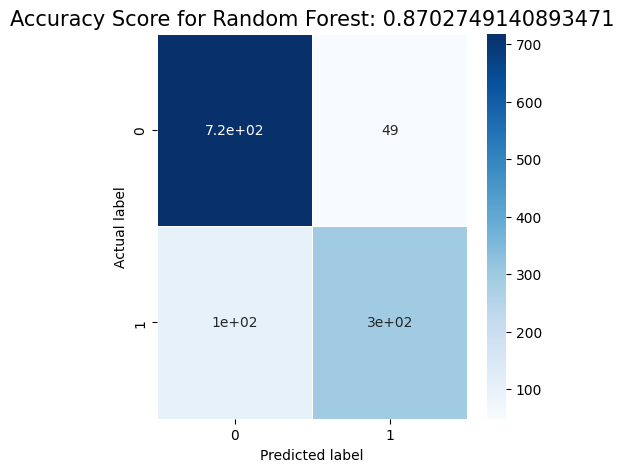

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

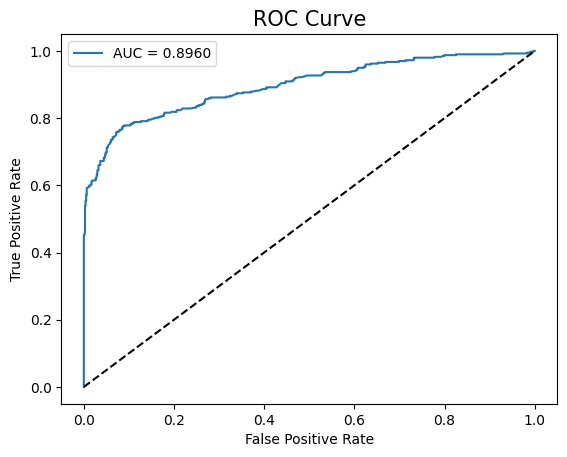

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

### **Decision Tree**

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1),
    'random_state': [0, 50,100],
    'criterion':['gini','entropy','log_loss']
}

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Utilizar el mejor modelo para hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

print(best_model)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=6,
                       random_state=0)


In [59]:
best_model

DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=6,
                       random_state=0)

In [60]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=6,random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=6,
                       random_state=0)

In [61]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 84.71 %


In [62]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8470790378006873
Precision Score :  0.8470790378006873
Recall Score :  0.8470790378006873
Jaccard Score :  0.7347242921013413
Log Loss :  5.511830157442313


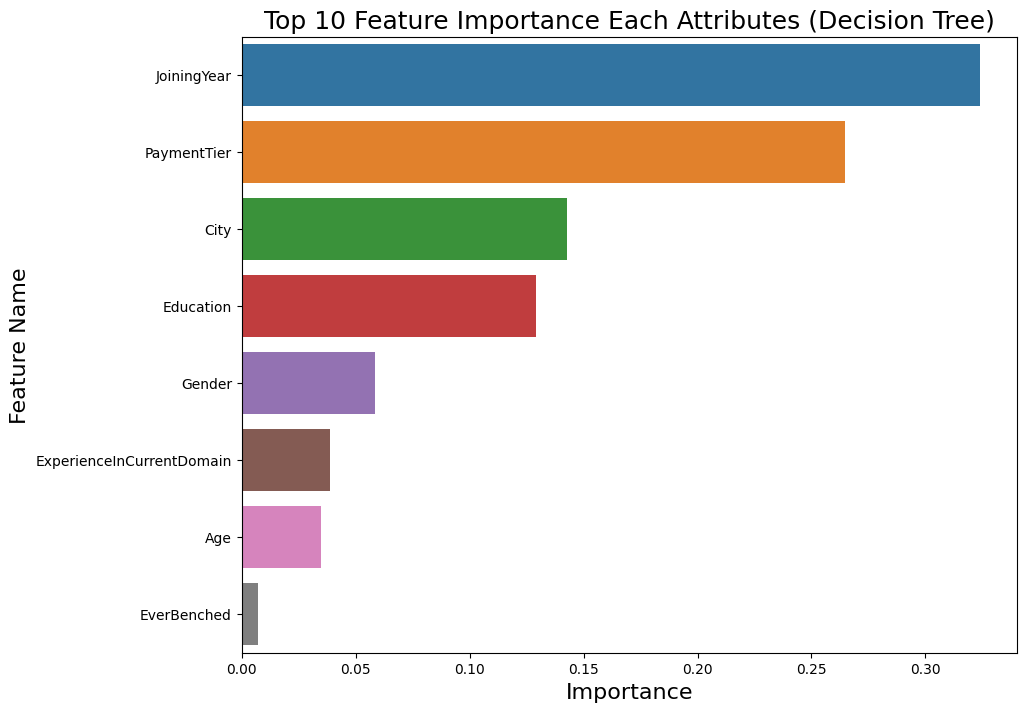

In [63]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

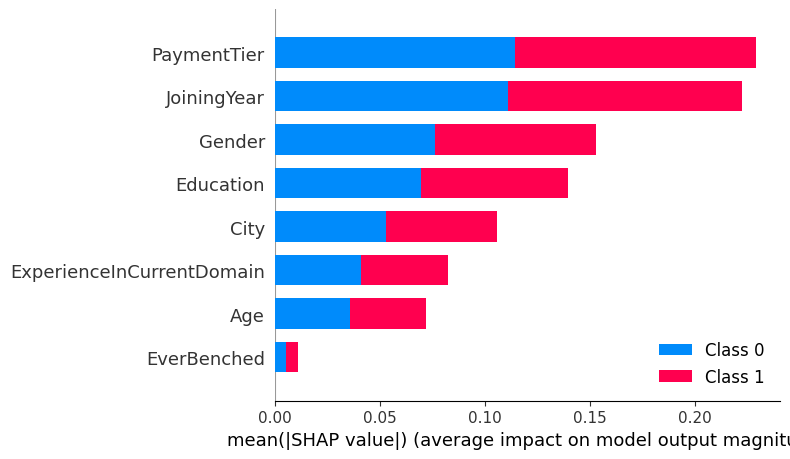

In [64]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


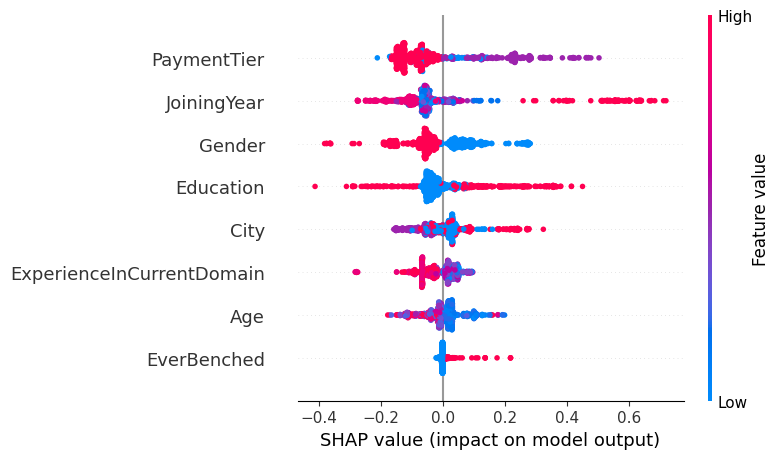

In [65]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


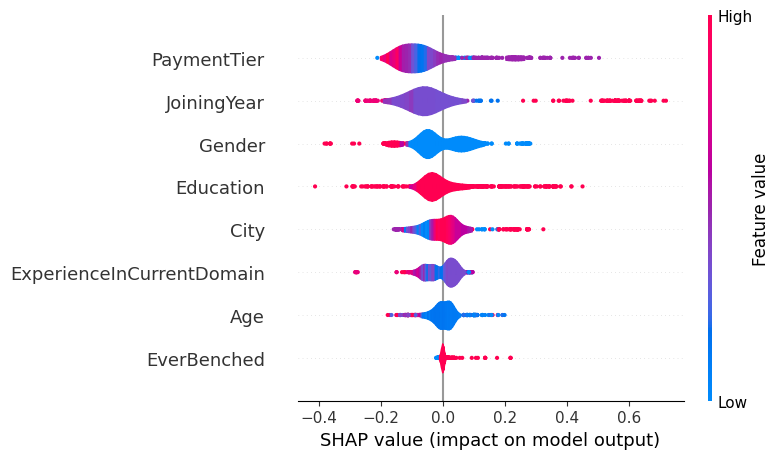

In [66]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns, plot_type="violin")

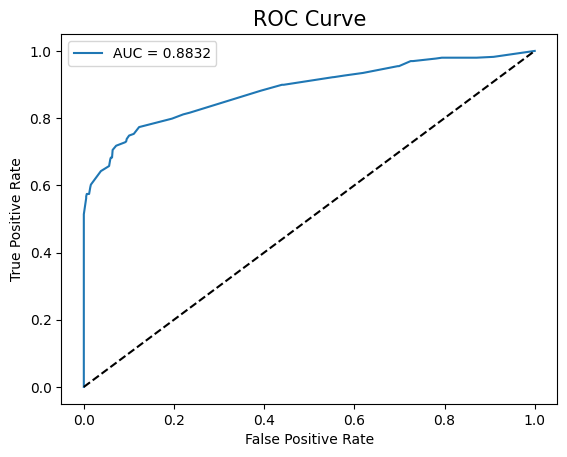

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

### Boosting: ADA boost classifier

In [72]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
model = AdaBoostClassifier()
param_grid = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R'],
    'random_state':[0,50,100]
}

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Utilizar el mejor modelo para hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

print(best_model)

AdaBoostClassifier(learning_rate=1, n_estimators=180, random_state=0)


In [73]:
best_model

AdaBoostClassifier(learning_rate=1, n_estimators=180, random_state=0)

In [88]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(learning_rate=1, n_estimators=180, random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=180, random_state=0)

In [89]:
y_pred = ada.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 80.07 %


In [90]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8006872852233677
Precision Score :  0.8006872852233677
Recall Score :  0.8006872852233677
Jaccard Score :  0.667621776504298
Log Loss :  7.183958407452903


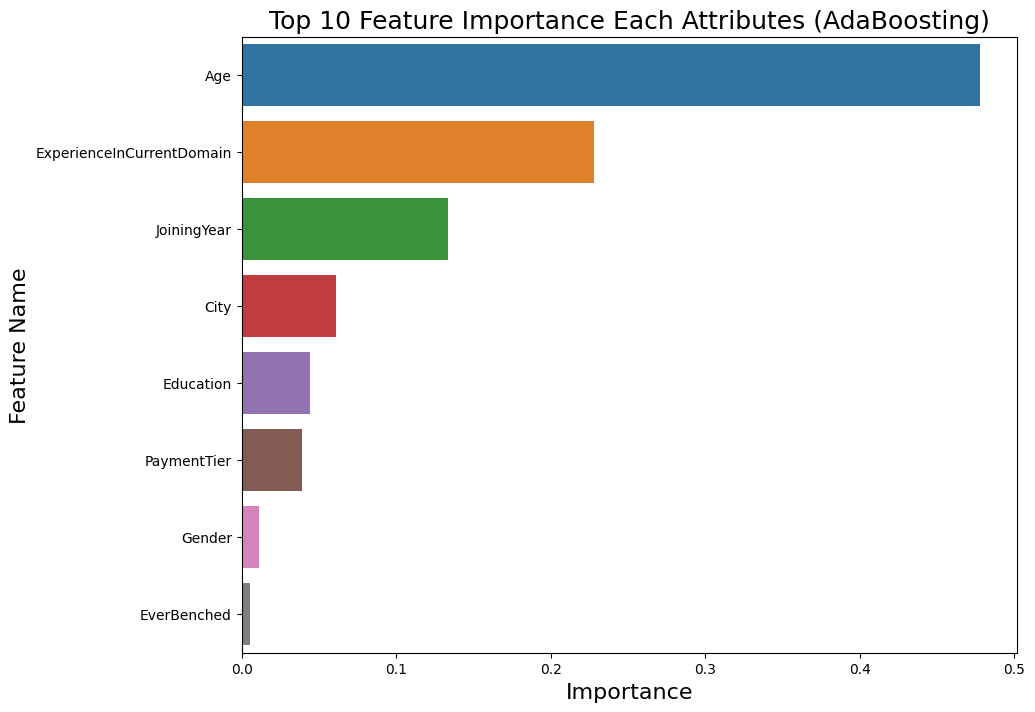

In [91]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": ada.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (AdaBoosting)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

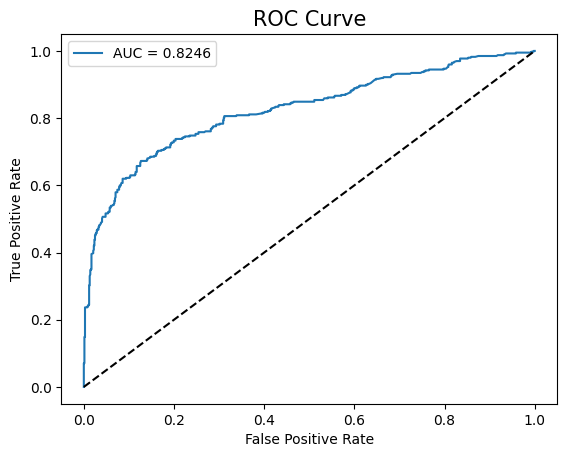

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = ada.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

### **Gradient Boosting Classifier**

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

param_grid = {
    'loss': ['deviance', 'exponential','log_loss'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200],
    'criterion':['friedman_mse', 'squared_error']

}

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Utilizar el mejor modelo para hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

print(best_model)

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in v

GradientBoostingClassifier(n_estimators=200)


In [101]:
best_model

GradientBoostingClassifier(n_estimators=200)

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(criterion='squared_error', n_estimators=200)
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='squared_error', n_estimators=200)

In [106]:
y_pred = gb.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 86.25 %


In [107]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8625429553264605
Precision Score :  0.8625429553264605
Recall Score :  0.8625429553264605
Jaccard Score :  0.7583081570996979
Log Loss :  4.95445407410545


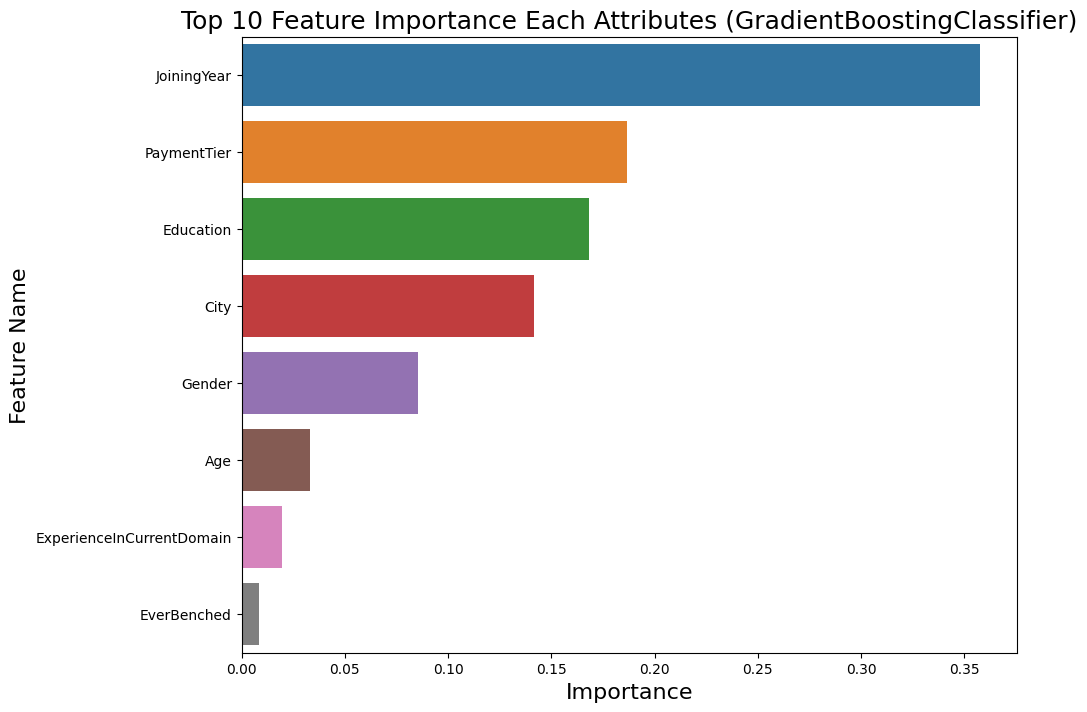

In [111]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": gb.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (GradientBoostingClassifier)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

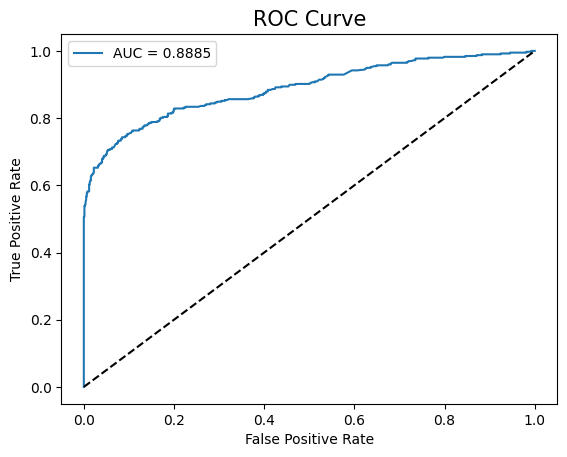

In [112]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = gb.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()